## THE SPARK FOUNDATION

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP

### TASK-6: PREDICTION USING DECISION TREE ALGORITHM

#### The task deals with understanding the working of decision trees. By creating a decison tree and visualizing it graphically

### Author: Purujit Dash.

#### Importing required libraries in Python

In [1]:
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing the Iris Dataset

In [2]:
iris= pd.read_csv("P:\Internship\SPARK FOUNDATION\TASK 6\Iris.csv")
print("Data Imported")

Data Imported


#### To see the first 10 rows of the data

In [3]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


#### To see the last 10 rows of the data

In [4]:
iris.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


#### Let's look at the columns within the dataset

In [5]:
print(iris.columns)
iris.shape

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


(150, 6)

#### Dropping the "Id" column as we don't need it for our analysis

In [6]:
iris=iris.drop(["Id"],axis=1)
print("The column Id has been removed")

The column Id has been removed


#### Again, looking at columns and rows of the dataset after dropping the column "Id"

In [7]:
print(iris.columns)
iris.shape

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


(150, 5)

#### Gathering more intel about the data

In [8]:
iris.describe()
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### The values within the column species

In [9]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

#### To see if there are any null values within the data

In [10]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### It can be seen that the dataset has no null values

#### Visualizing Species using Pair-plots

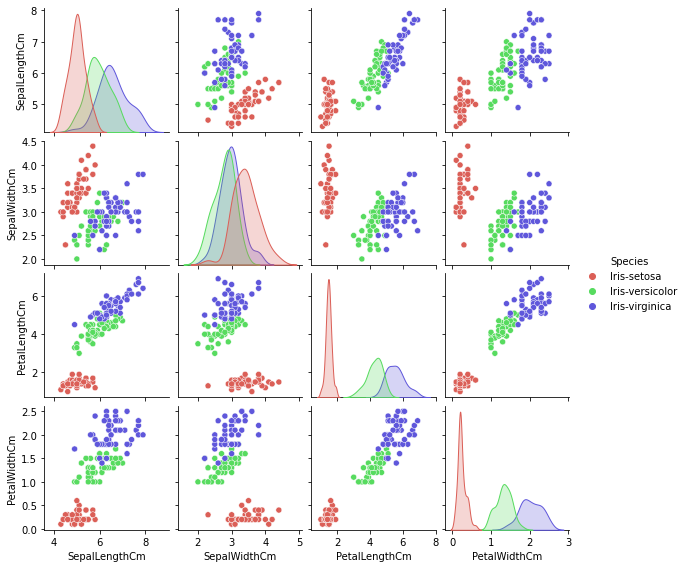

In [11]:
import seaborn as sns 
import warnings 

warnings.filterwarnings('ignore')
sns.pairplot (iris, hue='Species', palette="hls", size=2)

#### Visualizing using Box-plots

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

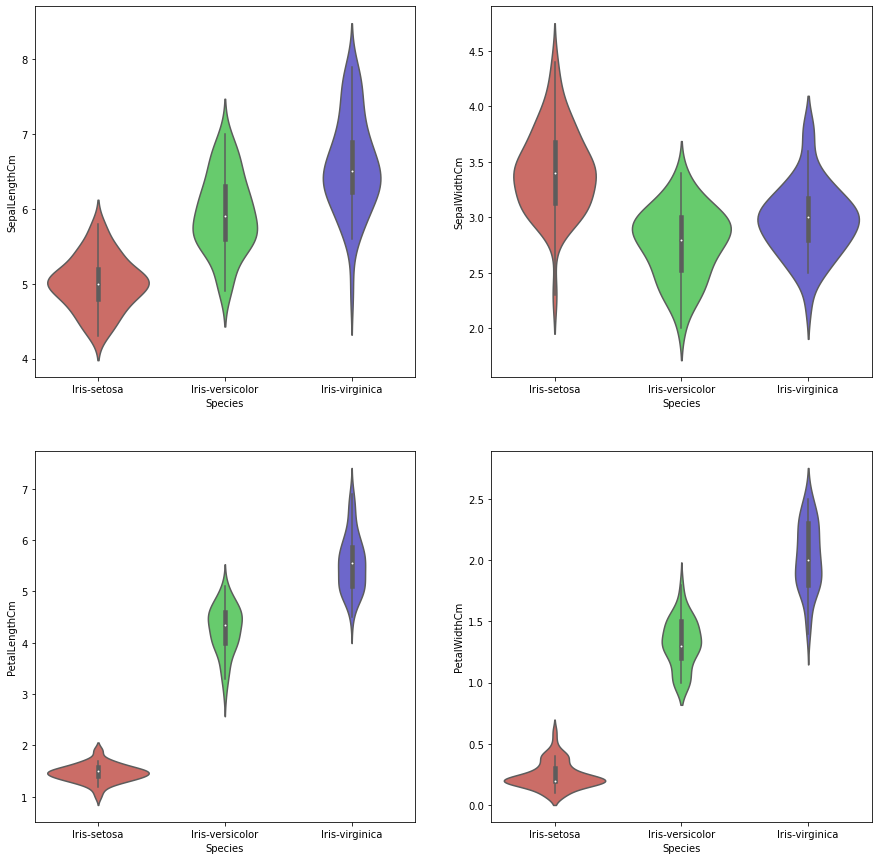

In [12]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.violinplot( x='Species', y='SepalLengthCm', data=iris, palette="hls")
plt.subplot(2,2,2)
sns.violinplot( x='Species', y='SepalWidthCm', data=iris, palette="hls")
plt.subplot(2,2,3)
sns.violinplot( x='Species', y='PetalLengthCm', data=iris, palette="hls")
plt.subplot(2,2,4)
sns.violinplot( x='Species', y='PetalWidthCm', data=iris, palette="hls")


##### It can be seen from the above plot that "iris-setosa" has a few outliers while other species are normally distributed.

#### Finding the coefficient of correlation

In [13]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


#### Visualizing using Heatmaps

<AxesSubplot:>

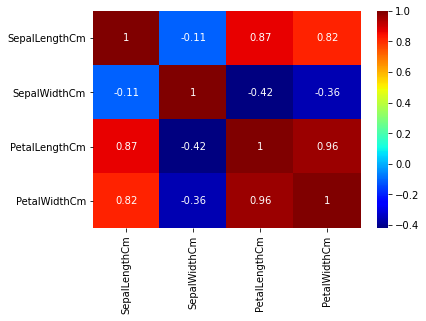

In [14]:
sns.heatmap(iris.corr(), annot=True, cmap="jet")

#### Plotting the Iris Dataset

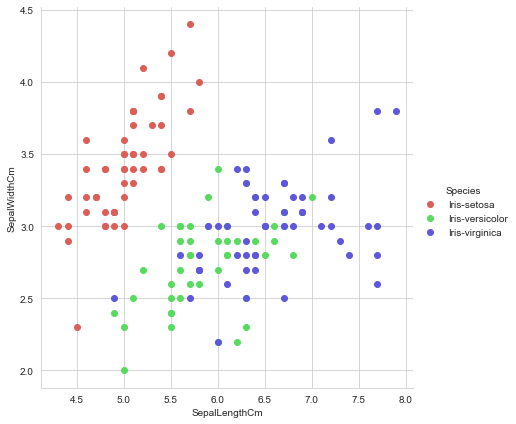

In [15]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="Species", palette="hls", height=6).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()


#### Some Pre-processing to create the Decision Tree

In [16]:
a=iris.iloc[:,:-1].values
b=iris.iloc[:,-1].values

#### Encoding Categorical Data

In [17]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
c=lab.fit_transform(b)
print(c)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


#### Splitting the data

In [18]:
from sklearn.model_selection import train_test_split  
a_train, a_test, c_train, c_test = train_test_split(a, c, test_size=0.2, random_state=0) 


#### Lets have a look at the train sets

In [19]:
print(a_train,c_train)

[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]
 [5.2 2.7 3.9 1.4]
 [5.7 3.8 1.7 0.3]
 [6.  2.7 5.1 1.6]
 [5.9 3.  4.2 1.5]
 [5.8 2.6 4.  1.2]
 [6.8 3.  5.5 2.1]
 [4.7 3.2 1.3 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.5 1.6 0.6]
 [5.4 3.7 1.5 0.2]
 [5.  2.  3.5 1. ]
 [6.5 3.  5.5 1.8]
 [6.7 3.3 5.7 2.5]
 [6.  2.2 5.  1.5]
 [6.7 2.5 5.8 1.8]
 [5.6 2.5 3.9 1.1]
 [7.7 3.  6.1 2.3]
 [6.3 3.3 4.7 1.6]
 [5.5 2.4 3.8 1.1]
 [6.3 2.7 4.9 1.8]
 [6.3 2.8 5.1 1.5]
 [4.9 2.5 4.5 1.7]
 [6.3 2.5 5.  1.9]
 [7.  3.2 4.7 1.4]
 [6.5 3.  5.2 2. ]
 [6.  3.4 4.5 1.6]
 [4.8 3.1 1.6 0.2]
 [5.8 2.7 5.1 1.9]
 [5.6 2.7 4.2 1.3]
 [5.6 2.9 3.6 1.3]
 [5.5 2.5 4.  1.3]
 [6.1 3.  4.6 1.4]
 [7.2 3.2 6.  1.8]
 [5.3 3.7 1.5 0.2]
 [4.3 3.  1.1 0.1]
 [6.4 2.7 5.3 1.9]
 [5.7 3.  4.2 1.2]
 [5.4 3.4 1.7 0.2]
 [5.7 4.4 1.5 0.4]
 [6.9 3.1 4.9 1.5]
 [4.6 3.1 1.5 0.2]
 [5.9 3.  5.1 1.8]
 [5.1 2.5 3.  1.1]
 [4.6 3.4 1.4 0.3]
 [6.2 2.2 4.5 1.5]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [4.8 3.  1.

#### Lets have a look at the test sets

In [20]:
print(a_test,c_test)

[[5.8 2.8 5.1 2.4]
 [6.  2.2 4.  1. ]
 [5.5 4.2 1.4 0.2]
 [7.3 2.9 6.3 1.8]
 [5.  3.4 1.5 0.2]
 [6.3 3.3 6.  2.5]
 [5.  3.5 1.3 0.3]
 [6.7 3.1 4.7 1.5]
 [6.8 2.8 4.8 1.4]
 [6.1 2.8 4.  1.3]
 [6.1 2.6 5.6 1.4]
 [6.4 3.2 4.5 1.5]
 [6.1 2.8 4.7 1.2]
 [6.5 2.8 4.6 1.5]
 [6.1 2.9 4.7 1.4]
 [4.9 3.1 1.5 0.1]
 [6.  2.9 4.5 1.5]
 [5.5 2.6 4.4 1.2]
 [4.8 3.  1.4 0.3]
 [5.4 3.9 1.3 0.4]
 [5.6 2.8 4.9 2. ]
 [5.6 3.  4.5 1.5]
 [4.8 3.4 1.9 0.2]
 [4.4 2.9 1.4 0.2]
 [6.2 2.8 4.8 1.8]
 [4.6 3.6 1.  0.2]
 [5.1 3.8 1.9 0.4]
 [6.2 2.9 4.3 1.3]
 [5.  2.3 3.3 1. ]
 [5.  3.4 1.6 0.4]] [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


#### Defining the decision tree algorithm

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=0)
dt.fit(a_train,c_train)

DecisionTreeClassifier(random_state=0)

#### Visualizing the Decision Tree 

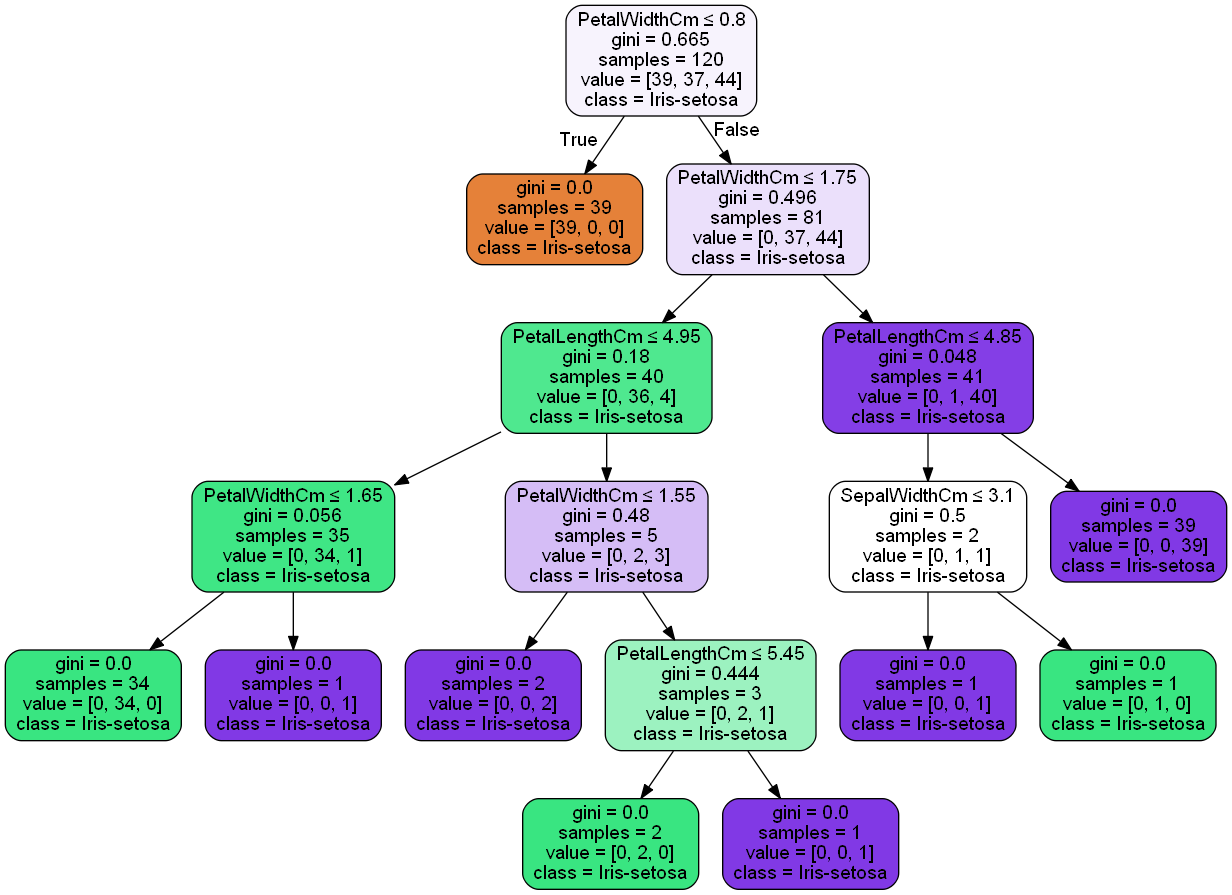

In [22]:
# Import necessary libraries for graph viz
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from pydotplus import graphviz

# Visualize the graph
dot_data = StringIO()
feanam=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
export_graphviz(dt, out_file=dot_data, feature_names=feanam, class_names=iris["Species"], 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Evaluating the Accuracy of the Data

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix 
predict=dt.predict(a_test)
print("Accuracy of the data: ", accuracy_score(predict,c_test)*100,"%")
print ('Consfusion matrix of the tested data:\n',confusion_matrix(predict,c_test))

Accuracy of the data:  100.0 %
Consfusion matrix of the tested data:
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


##### It can be seen that the **Accuracy of the data is 100%**, Therefore, feeding any new/test data to this classifer, can help predict the right class accordingly.

### Thank You!!